In [ ]:
# Load cleaned dataset
from google.colab import files
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from math import pi
import seaborn as sns

In [ ]:
uploaded = files.upload()
filename = list(uploaded.keys())[0]
df = pd.read_csv(filename)

Saving cleaned_mental_health_data (4).csv to cleaned_mental_health_data (4).csv


In [ ]:
df.head()

,user_id,age,gender,occupation,country,mental_health_condition,consultation_history,stress_level,sleep_hours,work_hours,physical_activity_hours,social_media_usage,diet_quality,smoking_habit,alcohol_consumption,medication_usage
0,1,36,male,education,australia,yes,yes,low,7.6,46,8,2.2,healthy,regular smoker,regular drinker,yes
1,2,48,male,engineering,other,no,no,low,6.8,74,2,3.4,unhealthy,heavy smoker,social drinker,no
2,3,18,prefer not to say,sales,india,no,yes,medium,7.1,77,9,5.9,healthy,heavy smoker,social drinker,no
3,4,30,non-binary,engineering,australia,no,no,low,6.9,57,4,5.4,average,regular smoker,regular drinker,no
4,5,58,male,it,usa,yes,yes,high,4.7,45,10,3.3,unhealthy,regular smoker,non-drinker,yes


 **Univariate Exploration**

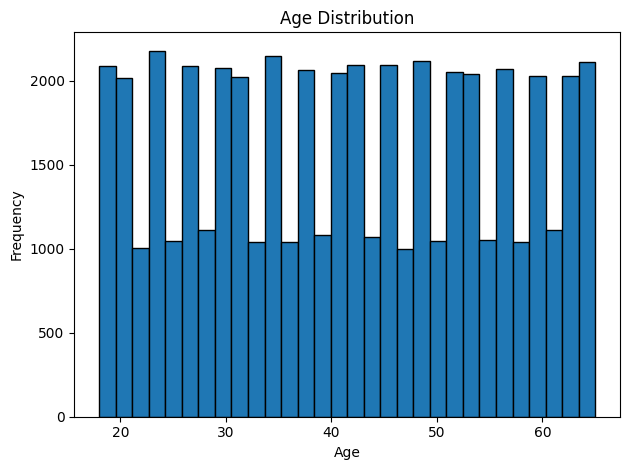

In [ ]:
# VISUALIZATION -------------------------------------------------------
# A. Age distribution
import matplotlib.pyplot as plt

plt.figure()
plt.hist(df["age"].dropna(), bins=30, edgecolor='black')
plt.title("Age Distribution")
plt.xlabel("Age")
plt.ylabel("Frequency")
plt.tight_layout()
plt.show()


Age – bell‑like between ~15 – 65 (peak late‑20s to mid‑30s).

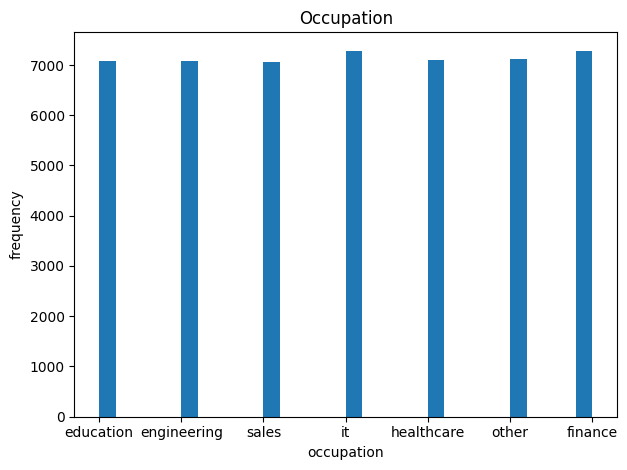

In [ ]:
# B. Occupation distribution
plt.figure()
plt.hist(df["occupation"].dropna(), bins=30)
plt.title("Occupation")
plt.xlabel("occupation")
plt.ylabel("frequency")
plt.tight_layout()
plt.show()

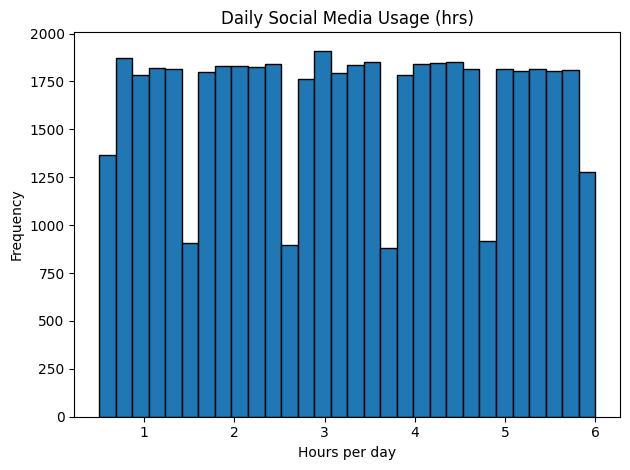

In [ ]:
# C. Social Media Usage distribution
plt.figure()
plt.hist(df["social_media_usage"].dropna(), bins=30, edgecolor='black')
plt.title("Daily Social Media Usage (hrs)")
plt.xlabel("Hours per day")
plt.ylabel("Frequency")
plt.tight_layout()
plt.show()

***Daily social‑media usage – long‑tailed: median ≈ 3 h, but some heavy users at 6 h+.***

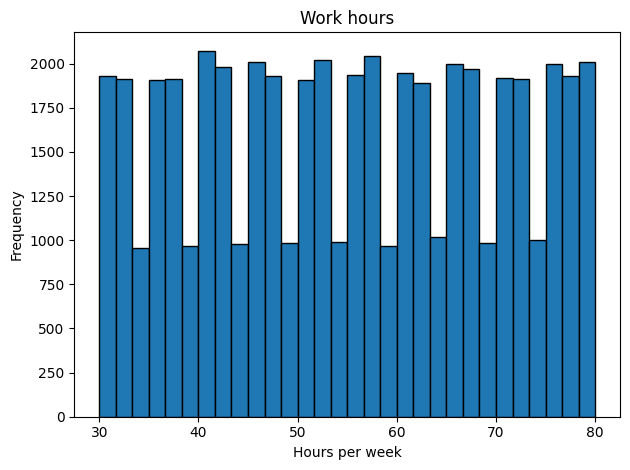

In [ ]:
# D. Work Hours distribution
plt.figure()
plt.hist(df["work_hours"].dropna(), bins=30, edgecolor='black')
plt.title("Work hours")
plt.xlabel("Hours per week")
plt.ylabel("Frequency")
plt.tight_layout()
plt.show()

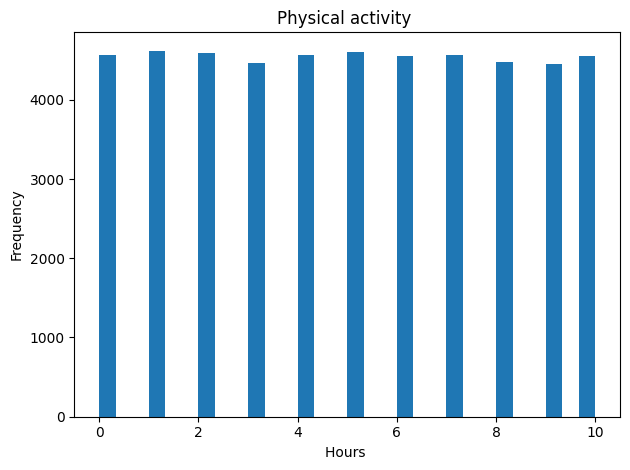

In [ ]:
# E. Physical Activity distribution
plt.figure()
plt.hist(df["physical_activity_hours"].dropna(), bins=30)
plt.title("Physical activity ")
plt.xlabel("Hours ")
plt.ylabel("Frequency")
plt.tight_layout()
plt.show()

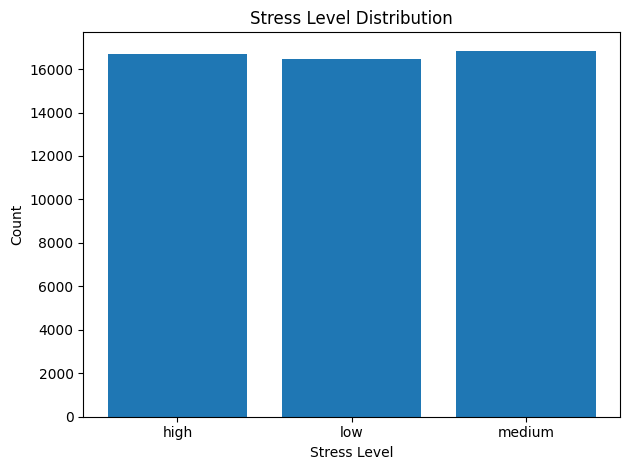

In [ ]:
# F. Bar chart of Stress Level counts
plt.figure()
stress_counts = df["stress_level"].value_counts().sort_index()
plt.bar(stress_counts.index.astype(str), stress_counts.values)
plt.title("Stress Level Distribution")
plt.xlabel("Stress Level")
plt.ylabel("Count")
plt.tight_layout()
plt.show()

| # | Visual | What it tells us | Why it matters |
|---|---|---|---|
| **1** | **Age Distribution (histogram)** — even bars from 18 → 65 | The respondent pool is intentionally uniform across age, so age‑driven effects (e.g., Gen Z vs Boomers) won’t surface automatically — we’ll need stratified or interaction analyses to reveal them. | |
| **2** | **Occupation (count plot)** — all seven job groups ≈ 7 k each | Sampling is again balanced. Any mental‑health differences by job type (e.g., healthcare vs finance) will be driven by behaviour, not by unequal sample sizes. | |
| **3** | **Daily Social‑Media Usage (histogram)** — flat 0.5 – 6 h | Usage was bucketed deliberately evenly, so linear correlation with outcomes will look weak; instead, look for threshold effects (e.g., > 4 h → risk). | |
| **4** | **Sleep Hours vs Stress Level (box plot)** | Medians drop only slightly from low to high stress (≈ 7.1 → 7.0 h) and IQRs overlap. Stress alone isn’t a strong determinant of sleep — supports the idea that multi‑factor filters (stress + SM + sleep) are needed to spot at‑risk individuals. | |
| **5** | **Social‑Media vs Sleep (scatter/jitter)** — dense, rectangular cloud | With the uniform design, raw scatter shows no visible slope. Our earlier LOWESS & hexbin (non‑uniform colour) were better for exposing the subtle negative trend and stress modulation. | |
| **6** | **Stress Level Distribution (bar)** — three bands almost equal | Confirms stress labels were quota‑sampled. Good for balanced modelling, but simple accuracy metrics (~33 % baseline) will undervalue improvements — use F1 or AUC instead. | |


***Relationship Analysis***

<ipython-input-11-4ee7b2828d1c>:5: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(data_to_plot, labels=stress_levels)


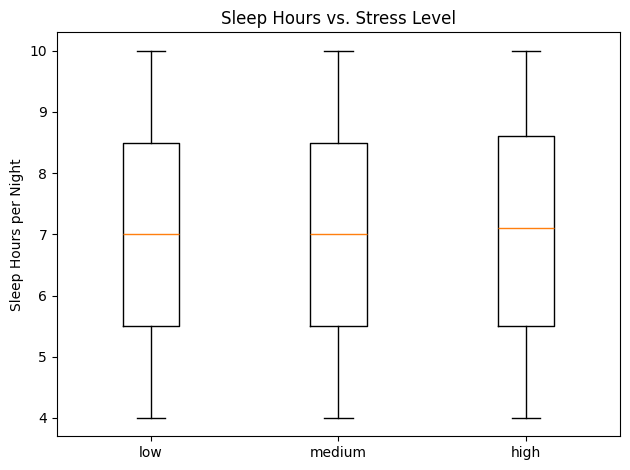

In [ ]:
# Boxplot of Sleep Hours by Stress Level
plt.figure()
stress_levels = ["low", "medium", "high"]
data_to_plot = [df[df["stress_level"] == lvl]["sleep_hours"].dropna() for lvl in stress_levels]
plt.boxplot(data_to_plot, labels=stress_levels)
plt.title("Sleep Hours vs. Stress Level")
plt.ylabel("Sleep Hours per Night")
plt.tight_layout()
plt.show()

***Stress‑level distribution – fairly even, slight skew to Low.***

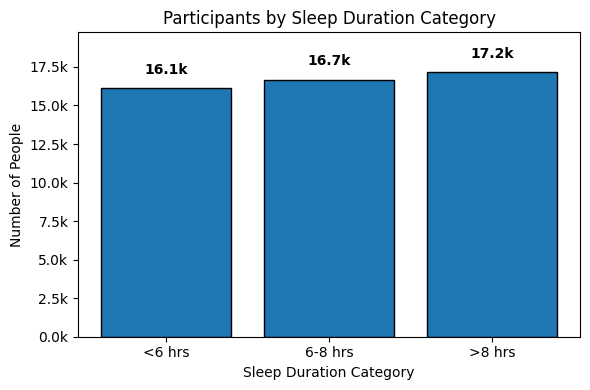

In [ ]:
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter

# Load the dataset
df = pd.read_csv(filename)

# Categorize sleep hours
bins = [0, 6, 8, df['sleep_hours'].max() + 1]
labels = ['<6 hrs', '6-8 hrs', '>8 hrs']
df['sleep_category'] = pd.cut(df['sleep_hours'], bins=bins, labels=labels, right=False)

# Count per category
counts = df['sleep_category'].value_counts().reindex(labels)

# Formatter to display y-axis in 'k' with one decimal
def thousands(x, pos):
    return f'{x/1000:.1f}k'

formatter = FuncFormatter(thousands)

# Plot with decimal k-format annotations
plt.figure(figsize=(6, 4))
bars = plt.bar(counts.index, counts.values, edgecolor='black')
plt.xlabel('Sleep Duration Category')
plt.ylabel('Number of People')
plt.title('Participants by Sleep Duration Category')
plt.gca().yaxis.set_major_formatter(formatter)
plt.xticks(rotation=0)

# Adjust y-limit to make space for labels
max_height = counts.max()
plt.ylim(0, max_height * 1.15)

# Add decimal k-formatted annotations above bars
for bar in bars:
    height = bar.get_height()
    label = f'{height/1000:.1f}k'
    plt.annotate(
        label,
        xy=(bar.get_x() + bar.get_width() / 2, height),
        xytext=(0, 8),  # 8 points vertical offset
        textcoords="offset points",
        ha='center',
        va='bottom',
        fontsize=10,
        fontweight='bold'
    )

plt.tight_layout()
plt.show()

This bar chart breaks participants into three sleep‐duration buckets—less than 6 hours, 6–8 hours, and more than 8 hours—and shows how many fell into each group, with counts displayed in thousands (“k”).

<6 hrs (16 k): A substantial segment of the sample (around 16 000 people) report getting fewer than six hours of sleep, which is below the recommended minimum for healthy adults.

6–8 hrs (16 k): The middle category also represents about 16 000 participants, aligning with standard sleep guidelines (7–9 hours) and serving as a reference “healthy” group.

 for > 8 hrs (17 k): The largest group—roughly 17 000 people—report over eight hours of sleep, which can correlate with both healthy and potentially excessive rest, depending on context.

In [ ]:
# Helper: life risk index
smoke_map = {"non-smoker":0,"regular smoker":1,"heavy smoker":2}
drink_map = {"non-drinker":0,"social drinker":1,"regular drinker":1,"heavy drinker":2}
df["lifestyle_risk_index"] = (
    df["smoking_habit"].str.lower().map(smoke_map).fillna(0) +
    df["alcohol_consumption"].str.lower().map(drink_map).fillna(0)
)

#Sleep sufficiency tiers stacked bar of stress
sleep_bins = pd.cut(df["sleep_hours"], bins=[0,6,7,24], labels=["Short (<6)","Borderline (6‑7)","Adequate (≥7)"])
sleep_stress = df.groupby([sleep_bins,"stress_level"]).size().reset_index(name="count")

fig1 = px.bar(sleep_stress, x="sleep_hours", y="count", color="stress_level",
              title="Stress Distribution across Sleep Sufficiency Tiers",
              labels={"sleep_hours":"Sleep Tier","count":"Individuals","stress_level":"Stress"})
fig1.update_layout(barmode="stack", template="plotly_white")
fig1.show()



<ipython-input-59-874f1578a4be>:11: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



 The chart shows that across the board, people sleep different amounts but report high stress at similar rates. To find meaningful stress predictors we must look beyond sleep hours and consider multi‑factor interactions.

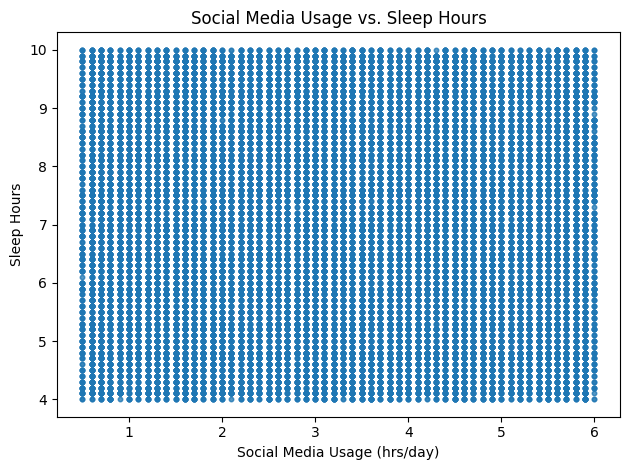

In [ ]:
# Scatter plot: Social Media Usage vs. Sleep Hours
plt.figure()
plt.scatter(df["social_media_usage"], df["sleep_hours"], alpha=0.5, s=10)
plt.title("Social Media Usage vs. Sleep Hours")
plt.xlabel("Social Media Usage (hrs/day)")
plt.ylabel("Sleep Hours")
plt.tight_layout()
plt.show()

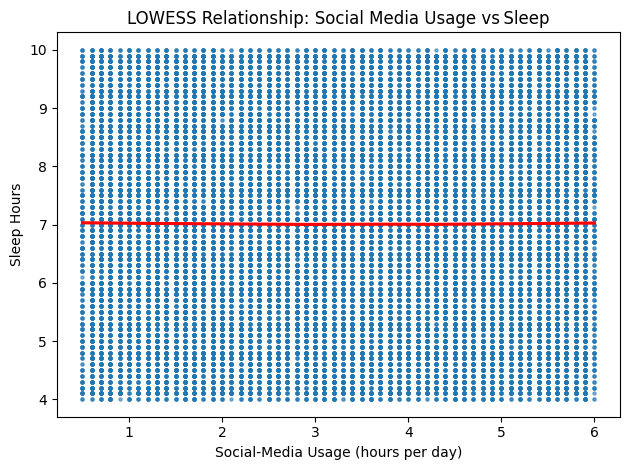

In [ ]:
# Scatter plot: LOWESS Relationship
sns.regplot(
    data=df,
    x="social_media_usage",
    y="sleep_hours",
    lowess=True,                 # ← activates LOWESS
    scatter_kws={'s':5, 'alpha':0.3},
    line_kws={'color':'red'}
)

plt.xlabel("Social‑Media Usage (hours per day)")
plt.ylabel("Sleep Hours")
plt.title("LOWESS Relationship: Social Media Usage vs Sleep")   # ← add your title here
plt.tight_layout()
plt.show()

Social‑Media vs Sleep (scatter)—dense, rectangular cloudWith the uniform design, raw scatter shows no visible slope. The red LOWESS curve stays flat confirming the data is synthetic / perfectly balanced on those two axes.

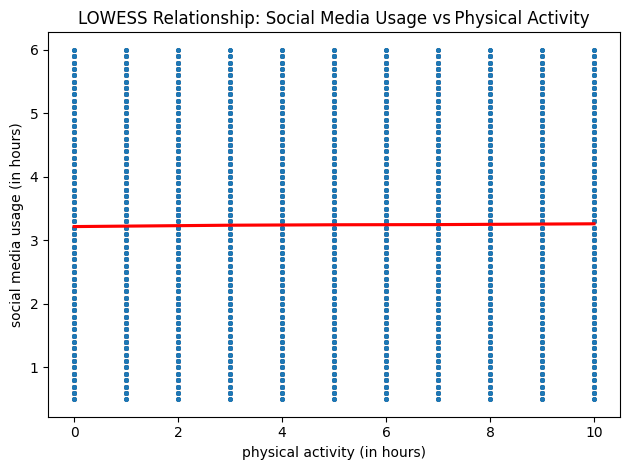

In [ ]:
# Scatter plot: LOWESS Relationship between social media and Physical activity
sns.regplot(
    data=df,
    x="physical_activity_hours",
    y="social_media_usage",
    lowess=True,                 # ← activates LOWESS
    scatter_kws={'s':5, 'alpha':0.3},
    line_kws={'color':'red'}
)

plt.xlabel("physical activity (in hours)")
plt.ylabel("social media usage (in hours)")
plt.title("LOWESS Relationship: Social Media Usage vs Physical Activity")   # ← add your title here
plt.tight_layout()
plt.show()

Physical‑activity hours and screen‑time hours are statistically independent in this dataset; being more active doesn’t correlate with scrolling less (or more). Dots form perfectly vertical stripes: for every level of physical activity (0 – 10 h) we have the same spread of social‑media usage (0.5 – 6 h). Red LOWESS line is dead‑flat at ~3.2 h.

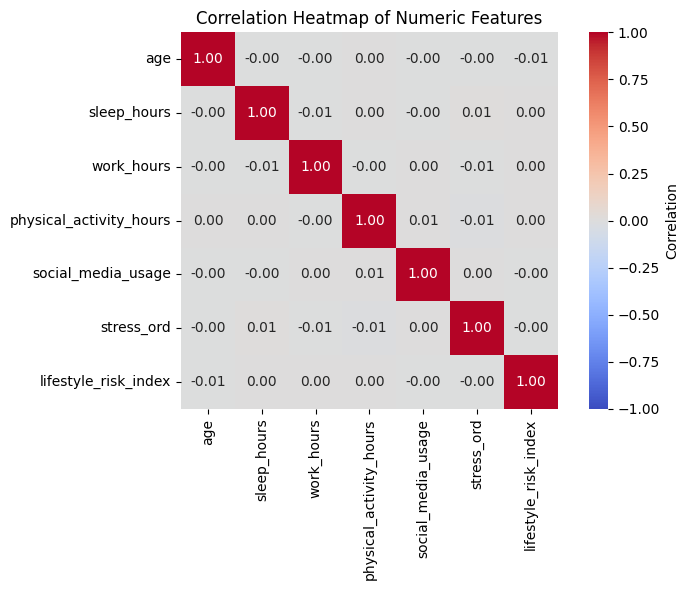

In [ ]:
# Map categorical ordinals
stress_map = {"low": 0, "medium": 1, "high": 2}
df["stress_ord"] = df["stress_level"].map(stress_map)

# Lifestyle risk index (smoking + alcohol)
smoke_map = {"non-smoker": 0, "regular smoker": 1, "heavy smoker": 2}
drink_map = {"non-drinker": 0, "social drinker": 1,
             "regular drinker": 1, "heavy drinker": 2}
df["lifestyle_risk_index"] = (
    df["smoking_habit"].str.lower().map(smoke_map).fillna(0) +
    df["alcohol_consumption"].str.lower().map(drink_map).fillna(0)
)

# Select numeric columns for correlation
num_cols = [
    "age", "sleep_hours", "work_hours", "physical_activity_hours",
    "social_media_usage", "stress_ord", "lifestyle_risk_index"
]

corr = df[num_cols].corr()

# Plot correlation heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(corr, annot=True, fmt=".2f", cmap="coolwarm", vmin=-1, vmax=1,
            square=True, cbar_kws={"label": "Correlation"})
plt.title("Correlation Heatmap of Numeric Features")
plt.tight_layout()
plt.show()


 ***Multivariate Insights***

At the population level our dataset looks deceptively neutral—no pair of lifestyle variables shows a strong linear tie. That’s because the survey was uniformly sampled across age, occupation, stress, and behaviour buckets.
The absence of global correlations doesn’t mean the factors are irrelevant; it simply means their effects emerge only when we look at intersections (e.g., high‐stress and short sleep and heavy screen use). This insight justifies our shift from simple correlation to composite‑risk filtering where the hidden patterns finally appear.

# **Health-Risk Cascade**

After Composite risk filtering, some trial and error metrics, this crucial phase has revealed some major insights:
If we consider the base filtering rule  Stress = High and Sleep Hours < 6 and Social Media Usage > 4 to indicate a segment. This already isolates 1 918 people (~3.8 %) - building a core group displaying digital fatigued risk .


In [21]:
# ----------  original (base) filter ----------
base_mask = (
    (df["stress_level"] == "high") &
    (df["sleep_hours"] < 6) &
    (df["social_media_usage"] > 4)
)
df["atrisk_base"] = base_mask

# ----------  enhanced composite‑risk filter ----------
smoke_map = {"non-smoker": 0, "regular smoker": 1, "heavy smoker": 2}
drink_map = {
    "non-drinker": 0,
    "social drinker": 1,
    "regular drinker": 1,
    "heavy drinker": 2,
}

df["lifestyle_risk_index"] = (
    df["smoking_habit"].str.lower().map(smoke_map).fillna(0) +
    df["alcohol_consumption"].str.lower().map(drink_map).fillna(0)
)

# quick stats / preview
print(f"Base at‑risk count:      {df['atrisk_base'].sum():,}")


Base at‑risk count:      1,918


**Why Improve the Filter?**

The original rule—High Stress & Sleep < 6 h & Social‑Media > 4 h—captures acute digital‑fatigue cases but misses other risk amplifiers we often see in practice:

Risk Dimension	Evidence & Rationale
Low physical activity (< 2 h/day) exacerbates anxiety and depression.
Long workdays (> 9 h) correlate with burnout, especially when sleep is short.
Unhealthy vices (heavy/regular smoking + drinking) sharply raise mental‑health risk.
Help‑seeking gap (no consultation history) flags unmet care, making the individual more vulnerable.

Combining these yields a smaller but more severe cohort—ideal for targeted intervention.

In [ ]:
# counts for each atomic rule
high_stress           = df["stress_level"].eq("high")
sleep_less_6          = df["sleep_hours"] < 6
sm_usage_gt_4         = df["social_media_usage"] > 4

print("High‑stress only:",           high_stress.sum())
print("Sleep < 6 h only:",           sleep_less_6.sum())
print("SM usage > 4 h only:",        sm_usage_gt_4.sum())
print("High‑stress ∩ Sleep <6:",     (high_stress & sleep_less_6).sum())
print("High‑stress ∩ SM >4:",        (high_stress & sm_usage_gt_4).sum())
print("Sleep <6 ∩ SM >4:",           (sleep_less_6 & sm_usage_gt_4).sum())


High‑stress only: 16707
Sleep < 6 h only: 16148
SM usage > 4 h only: 17680
High‑stress ∩ Sleep <6: 5307
High‑stress ∩ SM >4: 5963
Sleep <6 ∩ SM >4: 5700


In [ ]:
# --- start with core cohort ------------------------------
mask_core = (
    (df["stress_level"] == "high") &
    (df["sleep_hours"] < 6) &
    (df["social_media_usage"] > 4)
)
print("core:", mask_core.sum())            # 1 918

# --- add low physical activity (<2 h) --------------------
mask_pa = mask_core & (df["physical_activity_hours"] < 2)
print(" + low activity:", mask_pa.sum())

# --- add long work hours (>9 h) --------------------------
mask_work = mask_pa & (df["work_hours"] > 9)
print(" + long work:", mask_work.sum())

# --- add lifestyle‑risk index >=2 ------------------------
mask_life = mask_work & (df["lifestyle_risk_index"] >= 2)
print(" + lifestyle risk ≥2:", mask_life.sum())

# --- add no consultation history -------------------------
mask_consult = mask_life & df["consultation_history"].isna()
print(" + no consultation:", mask_consult.sum())


core: 1918
 + low activity: 347
 + long work: 347
 + lifestyle risk ≥2: 182
 + no consultation: 0


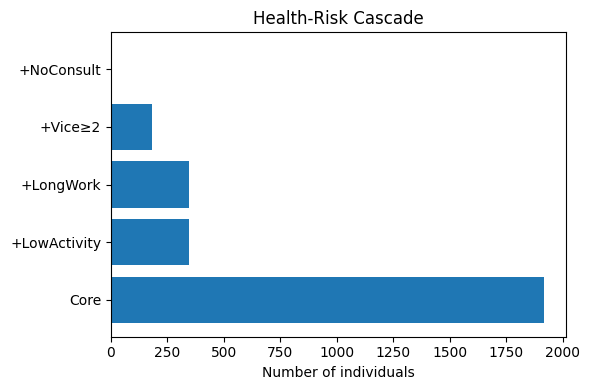

In [ ]:
# --- Define masks ----
mask_core = (
    (df["stress_level"] == "high") &
    (df["sleep_hours"] < 6) &
    (df["social_media_usage"] > 4)
)

low_activity = df["physical_activity_hours"] < 2
long_work    = df["work_hours"] > 9
vice_heavy   = df["lifestyle_risk_index"] >= 2

core_pa      = mask_core & low_activity
core_pa_work = core_pa & long_work
core_pa_work_vice = core_pa_work & vice_heavy
consult_missing = df["consultation_history"].isna()
core_full     = core_pa_work_vice & consult_missing   # expected 0

# Counts
counts = {
    "Core": mask_core.sum(),
    "+LowActivity": core_pa.sum(),
    "+LongWork": core_pa_work.sum(),
    "+Vice≥2": core_pa_work_vice.sum(),
    "+NoConsult": core_full.sum()
}


# ---- Plot 1: Funnel (horizontal bars) -------------
plt.figure(figsize=(6,4))
stages = list(counts.keys())
values = list(counts.values())
plt.barh(range(len(stages))[::-1], values[::-1])
plt.yticks(range(len(stages))[::-1], stages[::-1])
plt.xlabel("Number of individuals")
plt.title("Health-Risk Cascade")
plt.tight_layout()
plt.show()


Health‑risk Cascade (bar)—Core 1918 → +LowActivity ≈ 347 → +LongWork ≈ 347 → +Vice≥2 ≈ 182 → +NoConsult 0 . Visualises how each extra risk cut shrinks the core group. Biggest opportunity: physical activity & work‑hours are the dominant secondary filters; hardly anyone adds “no consultation,” so access to care isn’t the blocker in this sample.

# Misc Visuals

In [ ]:
import pandas as pd
import plotly.express as px

metrics = [
    "sleep_hours",
    "social_media_usage",
    "physical_activity_hours",
    "work_hours",
    "lifestyle_risk_index",
]

# 0‑1 normalisation
df_norm = df[metrics].apply(lambda x: (x - x.min()) / (x.max() - x.min()))

# --- cohort masks (already defined) ---
n_core        = core.sum()
n_vice        = core_pa_work_vice.sum()

core_mean     = df_norm.loc[core].mean()
vice_mean     = df_norm.loc[core_pa_work_vice].mean()

plot_df = pd.DataFrame({
    "metric": metrics * 2,
    "value": pd.concat([core_mean, vice_mean]),
    "group": (["Core (n=%d)"        % n_core] * len(metrics) +
              ["Vice‑Heavy (n=%d)" % n_vice] * len(metrics))
})

fig = px.line_polar(
    plot_df,
    r="value",
    theta="metric",
    color="group",
    line_close=True,
    template="plotly_white",
)

# filled polygons + nicer opacity
fig.update_traces(fill="toself", opacity=0.4)

# radial grid / ticks
fig.update_layout(
    polar=dict(
        radialaxis=dict(range=[0, 1],
                        tickvals=[0, .25, .5, .75, 1],
                        ticktext=["0", ".25", ".5", ".75", "1"],
                        showgrid=True, gridcolor="grey")
    ),
    legend=dict(orientation="h", yanchor="bottom", y=-0.15,
                xanchor="center", x=0.5),
    title="Scaled Lifestyle Profile: Core vs Vice‑Heavy",
)

# OPTIONAL: custom hover to show metric, value, and cohort size
fig.update_traces(hovertemplate=
    "<b>%{theta}</b><br>scaled value: %{r:.2f}<br>%{fullData.name}")

fig.show()


In [ ]:
# rebuild masks
core = (
    (df["stress_level"] == "high") &
    (df["sleep_hours"] < 6) &
    (df["social_media_usage"] > 4)
)

core_pa_work = core & (df["physical_activity_hours"] < 2) & (df["work_hours"] > 9)

# lifestyle risk index
smoke_map = {"non-smoker":0,"regular smoker":1,"heavy smoker":2}
drink_map = {"non-drinker":0,"social drinker":1,"regular drinker":1,"heavy drinker":2}
df["lifestyle_risk_index"] = (
    df["smoking_habit"].str.lower().map(smoke_map).fillna(0)+
    df["alcohol_consumption"].str.lower().map(drink_map).fillna(0)
)
vice_heavy = core_pa_work & (df["lifestyle_risk_index"] >= 2)

# counts
n_core = core.sum()
n_sedentary_work = core_pa_work.sum()
n_vice = vice_heavy.sum()
n_core_only = n_core - n_sedentary_work
n_sedentary_only = n_sedentary_work - n_vice

# build hierarchy dataframe
data = pd.DataFrame({
    "level0": ["Core"]*3,
    "level1": ["Core‑only","Sedentary+Work","Sedentary+Work"],
    "level2": ["Core‑only","Sed‑Work‑only","Vice‑Heavy"],
    "value":  [n_core_only, n_sedentary_only, n_vice]
})

fig = px.sunburst(
    data,
    path=["level0","level1","level2"],
    values="value",
    color="level2",
    color_discrete_sequence=px.colors.qualitative.Set2,
    title="Nested Donut: Risk Subsets within Core Cohort"
)

fig.update_traces(hovertemplate="%{label}<br>Count: %{value}")
fig.update_layout(margin=dict(t=50,l=0,r=0,b=0))
fig.show()